# 3C454.3 analysis notebook
## Prerequisities: in order to run this notebook you need the AGILE data.

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

ModuleNotFoundError: No module named 'agilepy'

In [2]:
from os.path import expandvars
from pathlib import Path
import shutil

In [167]:
%matplotlib notebook

## Analysis name

In [168]:
user = "bulgarelli"
analysisdate = "20101110"
sourceName = "3C454d3"
analysisname = user+"_"+analysisdate+"_"+sourceName
print("Analysis:",analysisname)

Analysis: bulgarelli_20101110_3C454d3


## Output directory

In [169]:
outDir = expandvars(f"$HOME/agilepy_analysis/{analysisname}/output")

if Path(outDir).exists():
    print("Deleting",outDir)
    shutil.rmtree(outDir)
else:
    print("Output directory:",outDir)

Deleting /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output


## Configuration 

In [170]:
tmin = 55513.0 # 2010-11-05 00:00:00.000 UTC
tmax = 55520.0 # 	2010-12-05 00:00:00.000 UTC
timetype = "MJD" # "MJD" OR "TT"
glon = 86.11
glat = -38.18

In [171]:
config = """
input:
  evtfile: /AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index
  logfile: /AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index

output:
  outdir: %s
  filenameprefix: %s_product
  logfilenameprefix: %s_log
  verboselvl: 2

selection:
  tmin: %f
  tmax: %f
  timetype: %s
  glon: %f
  glat: %f
  fovradmax: 60
  albedorad: 80
  proj: ARC
  
maps:
  mapsize: 40
  spectralindex: 2.1
  timestep: 160
  binsize: 0.25
  energybins:
    - 100, 10000
  fovbinnumber: 1
  

model:
  modelfile: null
  galmode: 1
  isomode: 1
  galcoeff: null
  isocoeff: null
  emin_sources: 100
  emax_sources: 10000


mle:
  ranal: 10
  ulcl: 2
  loccl: 95
  expratioevaluation: yes
  expratio_minthr: 0
  expratio_maxthr: 15
  expratio_size: 10  
  
"""%(outDir, analysisname, analysisname, tmin, tmax, timetype, glon, glat)

with open("./agilepy_conf.yaml", "w") as cf:
    cf.write(config)

## Obtaining the AGAnalysis object

In [172]:
ag = AGAnalysis("./agilepy_conf.yaml")

2020-03-07 09:59:57,491 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/logs/bulgarelli_20101110_3C454d3_log_20200307-095957.log
2020-03-07 09:59:57,492 [INFO    ] [AgilepyLogger] Removing logger...


## Sources hypothesis

In [173]:
sources = ag.loadSourcesFromCAT2(rangeDist = (0, 5))

In [144]:
for s in sources:
    print(s)


-----------------------------------------------------------
Source name: 2AGLJ2247+1558 (PointSource)
  * Position:
	- start_pos: (84.2229, -37.4782)
	- dist from (l,b): 1.6474
  * Spectrum: (PowerLaw)
	- flux: 6.05327e-08
	- index: 2.75651
  * Free params: 
-----------------------------------------------------------

-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: 
-----------------------------------------------------------


## Adding a source at runtime

In [145]:
#newSourceDict = {
#    "glon" : 79.3,
#    "glat": 0.554,
#    "spectrumType" : "PowerLaw",
#    "flux": 1.69737e-07,
#    "index": 2.1
#}

#s = ag.addSource("CYGX3", newSourceDict)

#print(s)

## Deleting sources
Selection params = [name, dist, flux, sqrtts]

In [146]:
deletedSources = ag.deleteSources('flux <= 10e-08')

## Selecting sources

In [147]:
sources = ag.selectSources("flux > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: 
-----------------------------------------------------------


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature, index2]

In [148]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "flux", True)

In this example, only one source is affected.

In [149]:
for source in affectedSources:
    print(source)


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
-----------------------------------------------------------


## Analysis

In [150]:
ag.generateMaps()

'/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/bulgarelli_20101110_3C454d3_product.maplist4'

[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


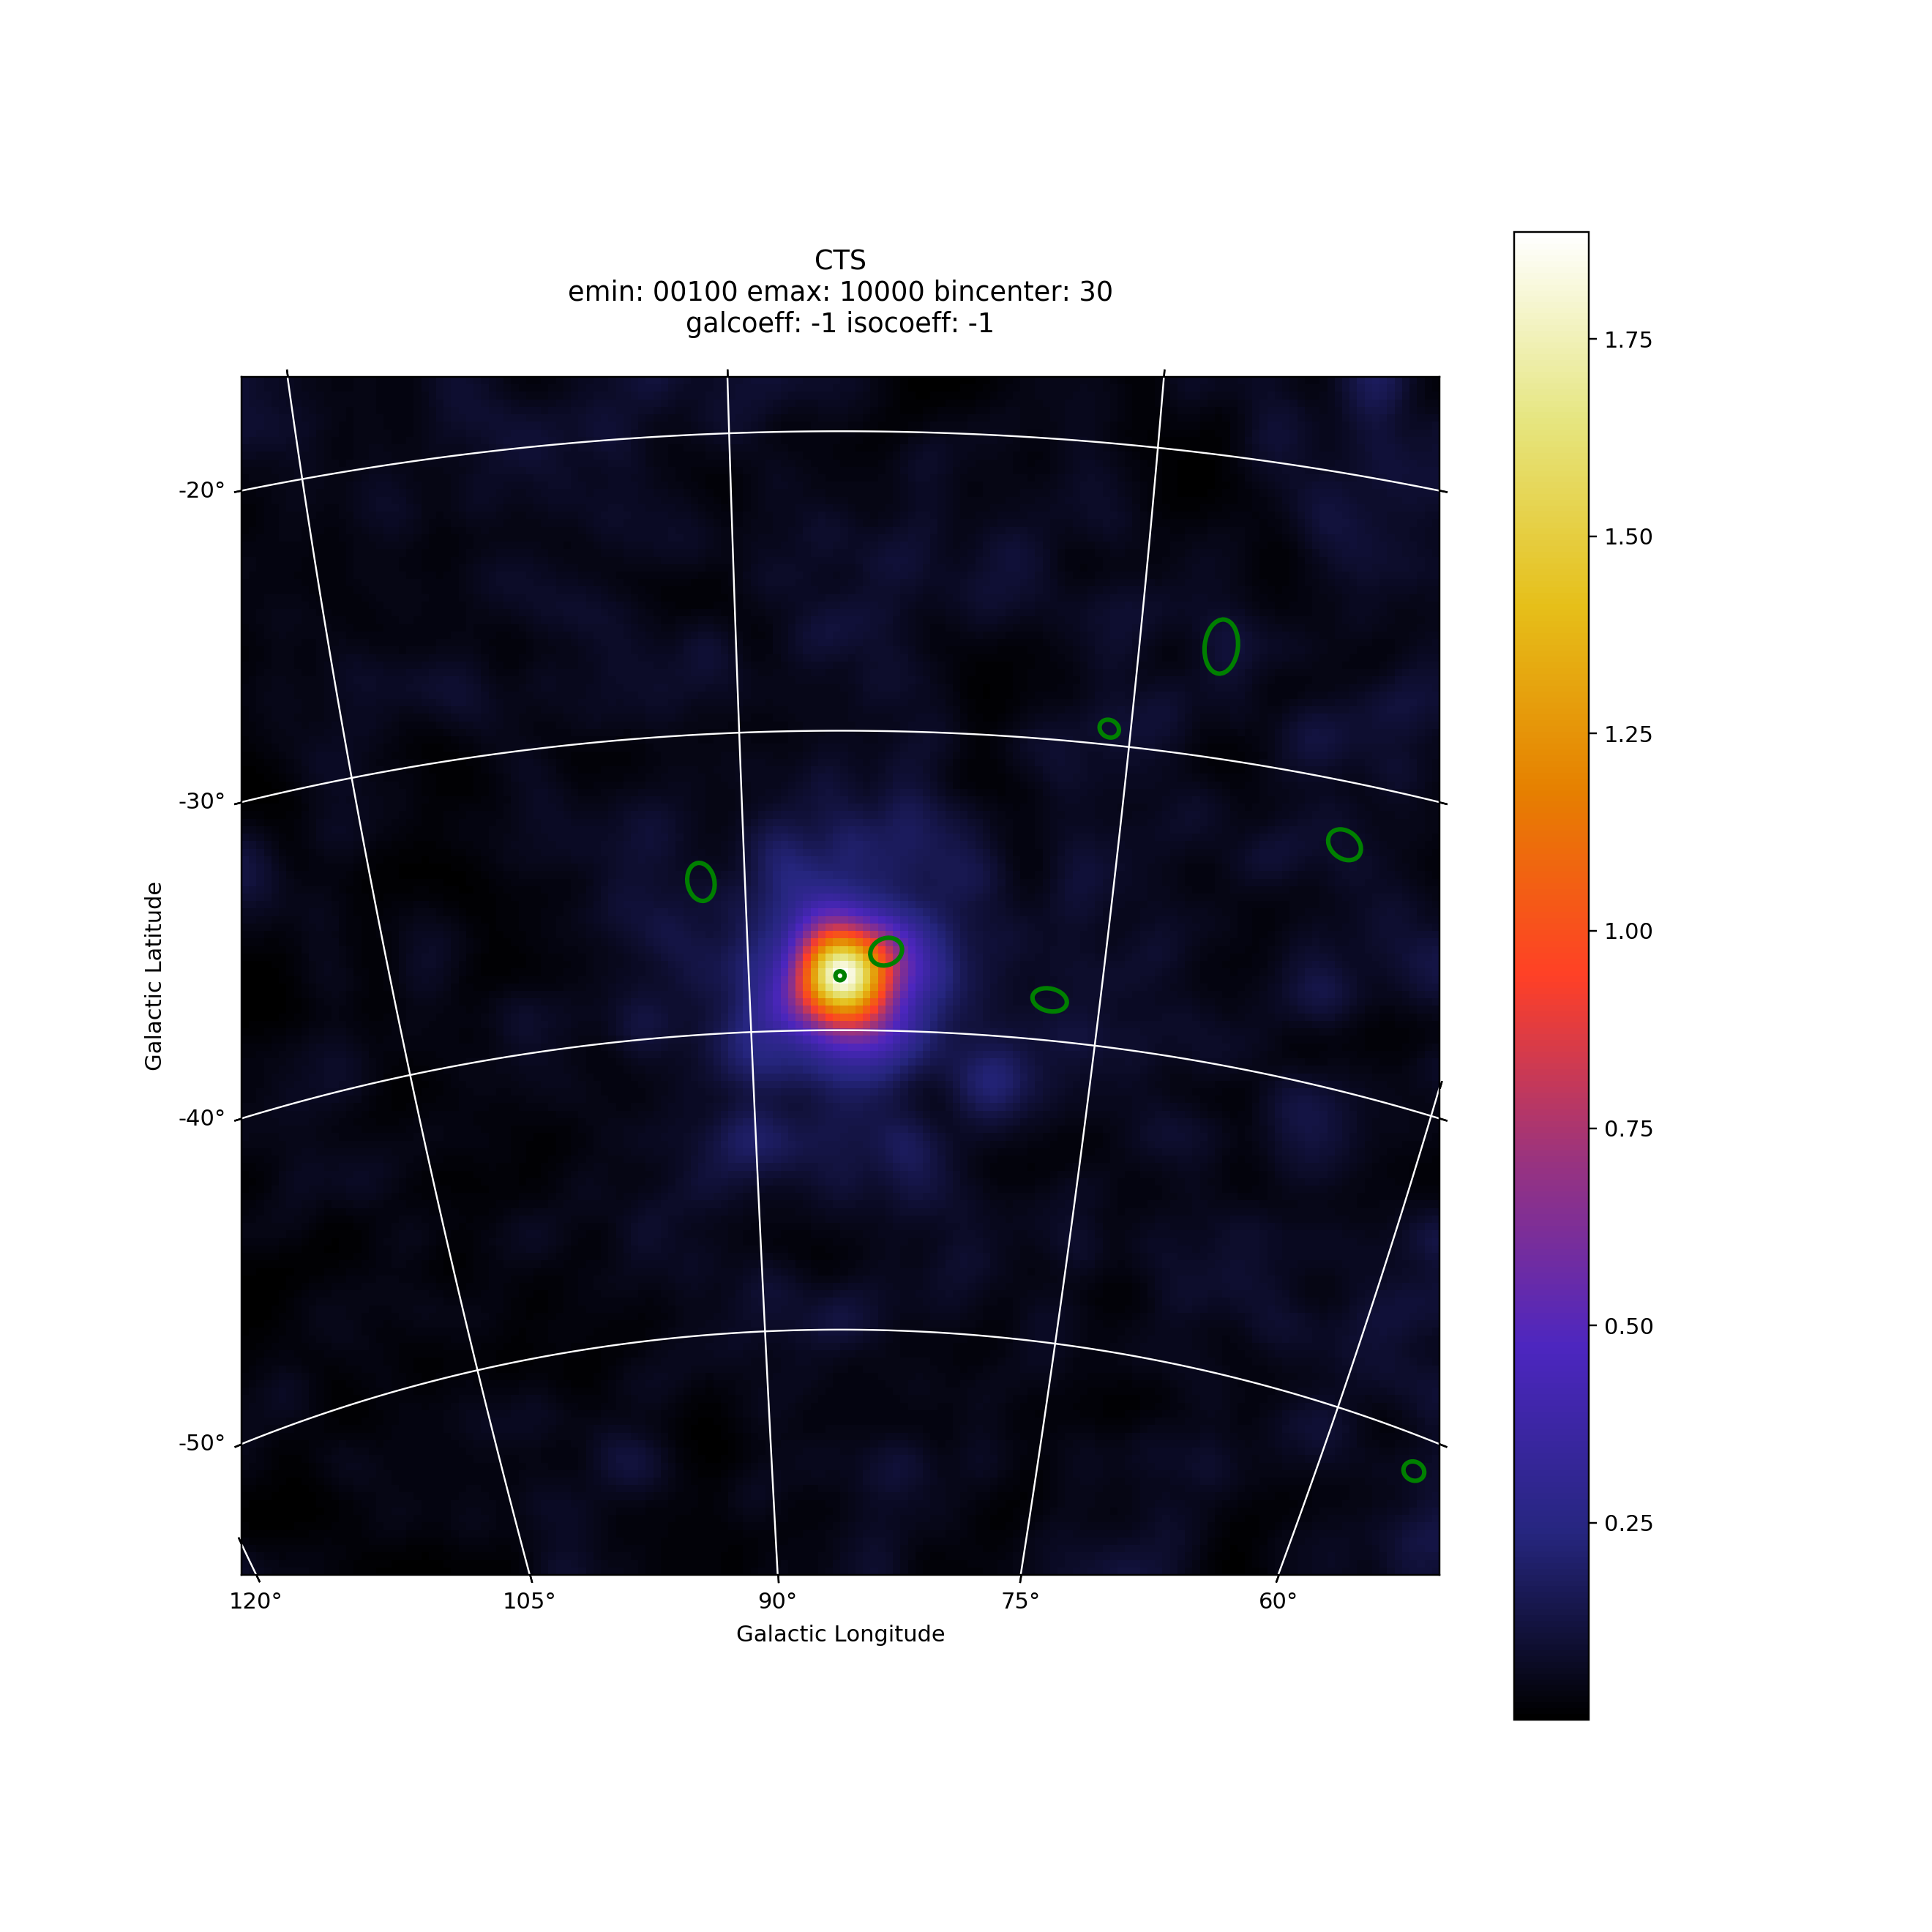

/home/rt/.conda/envs/agilepy/lib/python3.7/site-packages/regions/shapes/ellipse.py:213: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  **mpl_params)


[None]

In [151]:
ag.displayCtsSkyMaps(smooth=True, sigma=3, regFilePath="$AGILE/catalogs/2AGL_2.reg")

[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


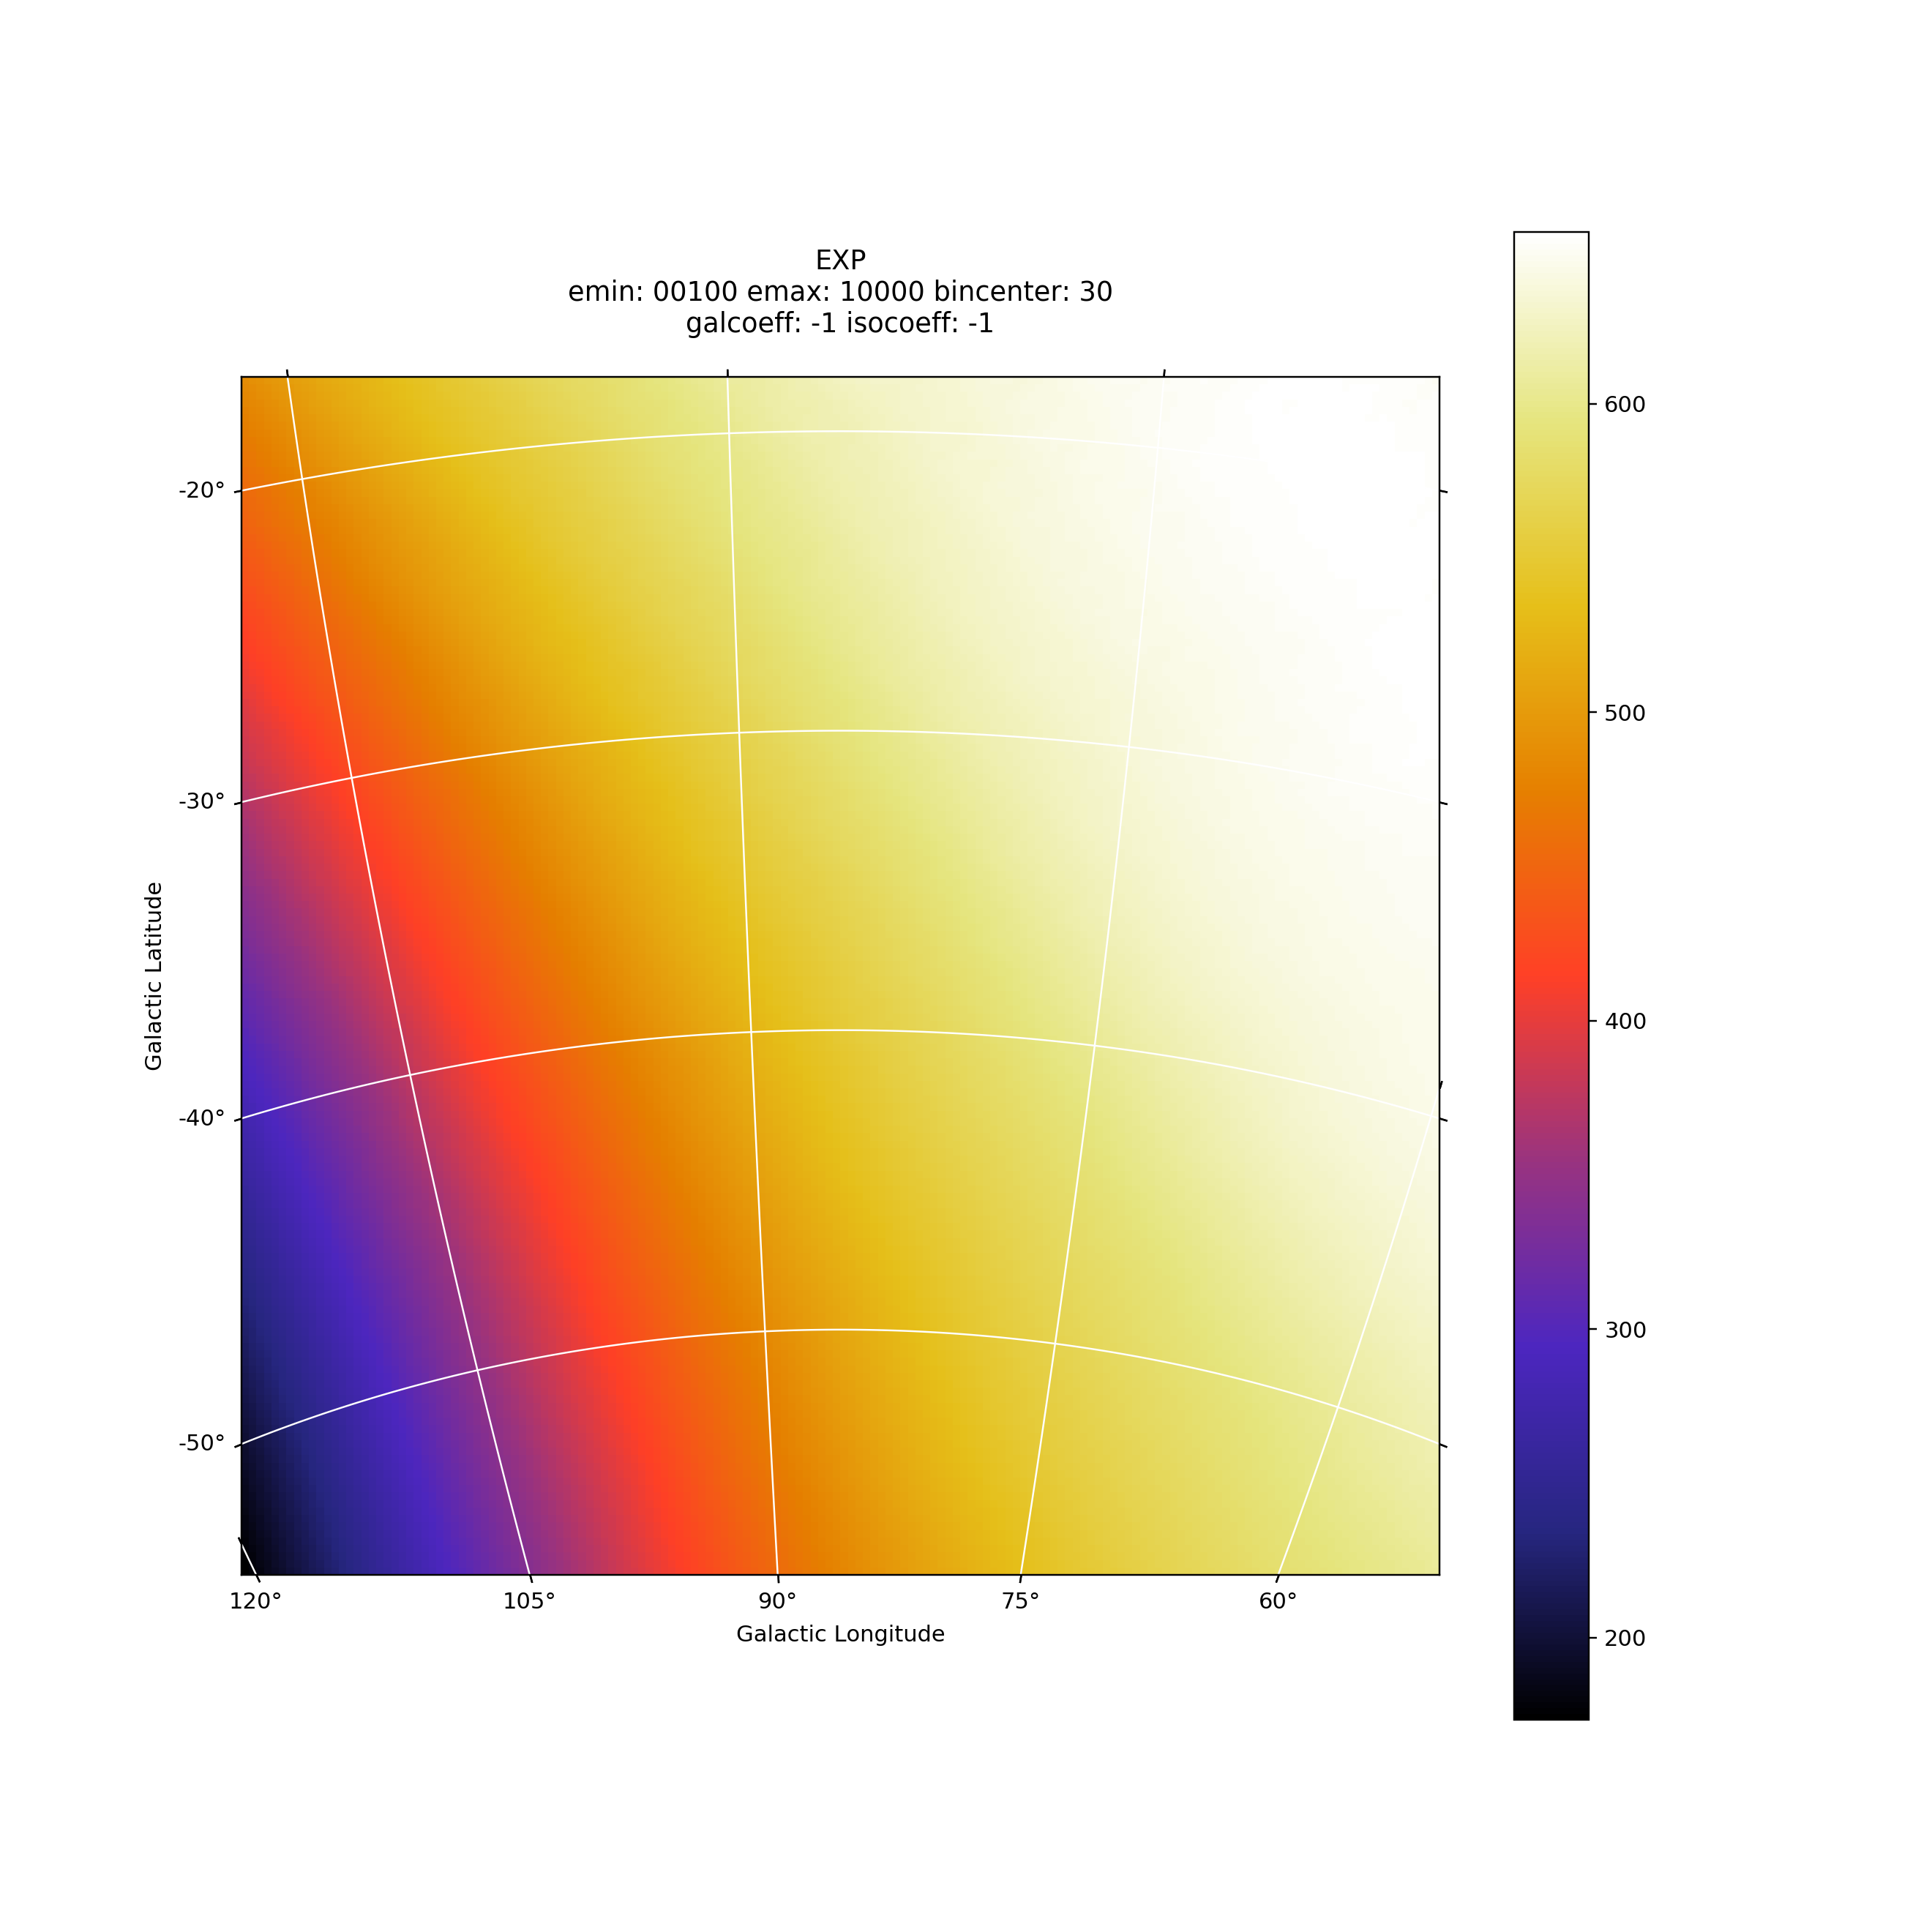

[None]

In [152]:
ag.displayExpSkyMaps()

[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
[AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


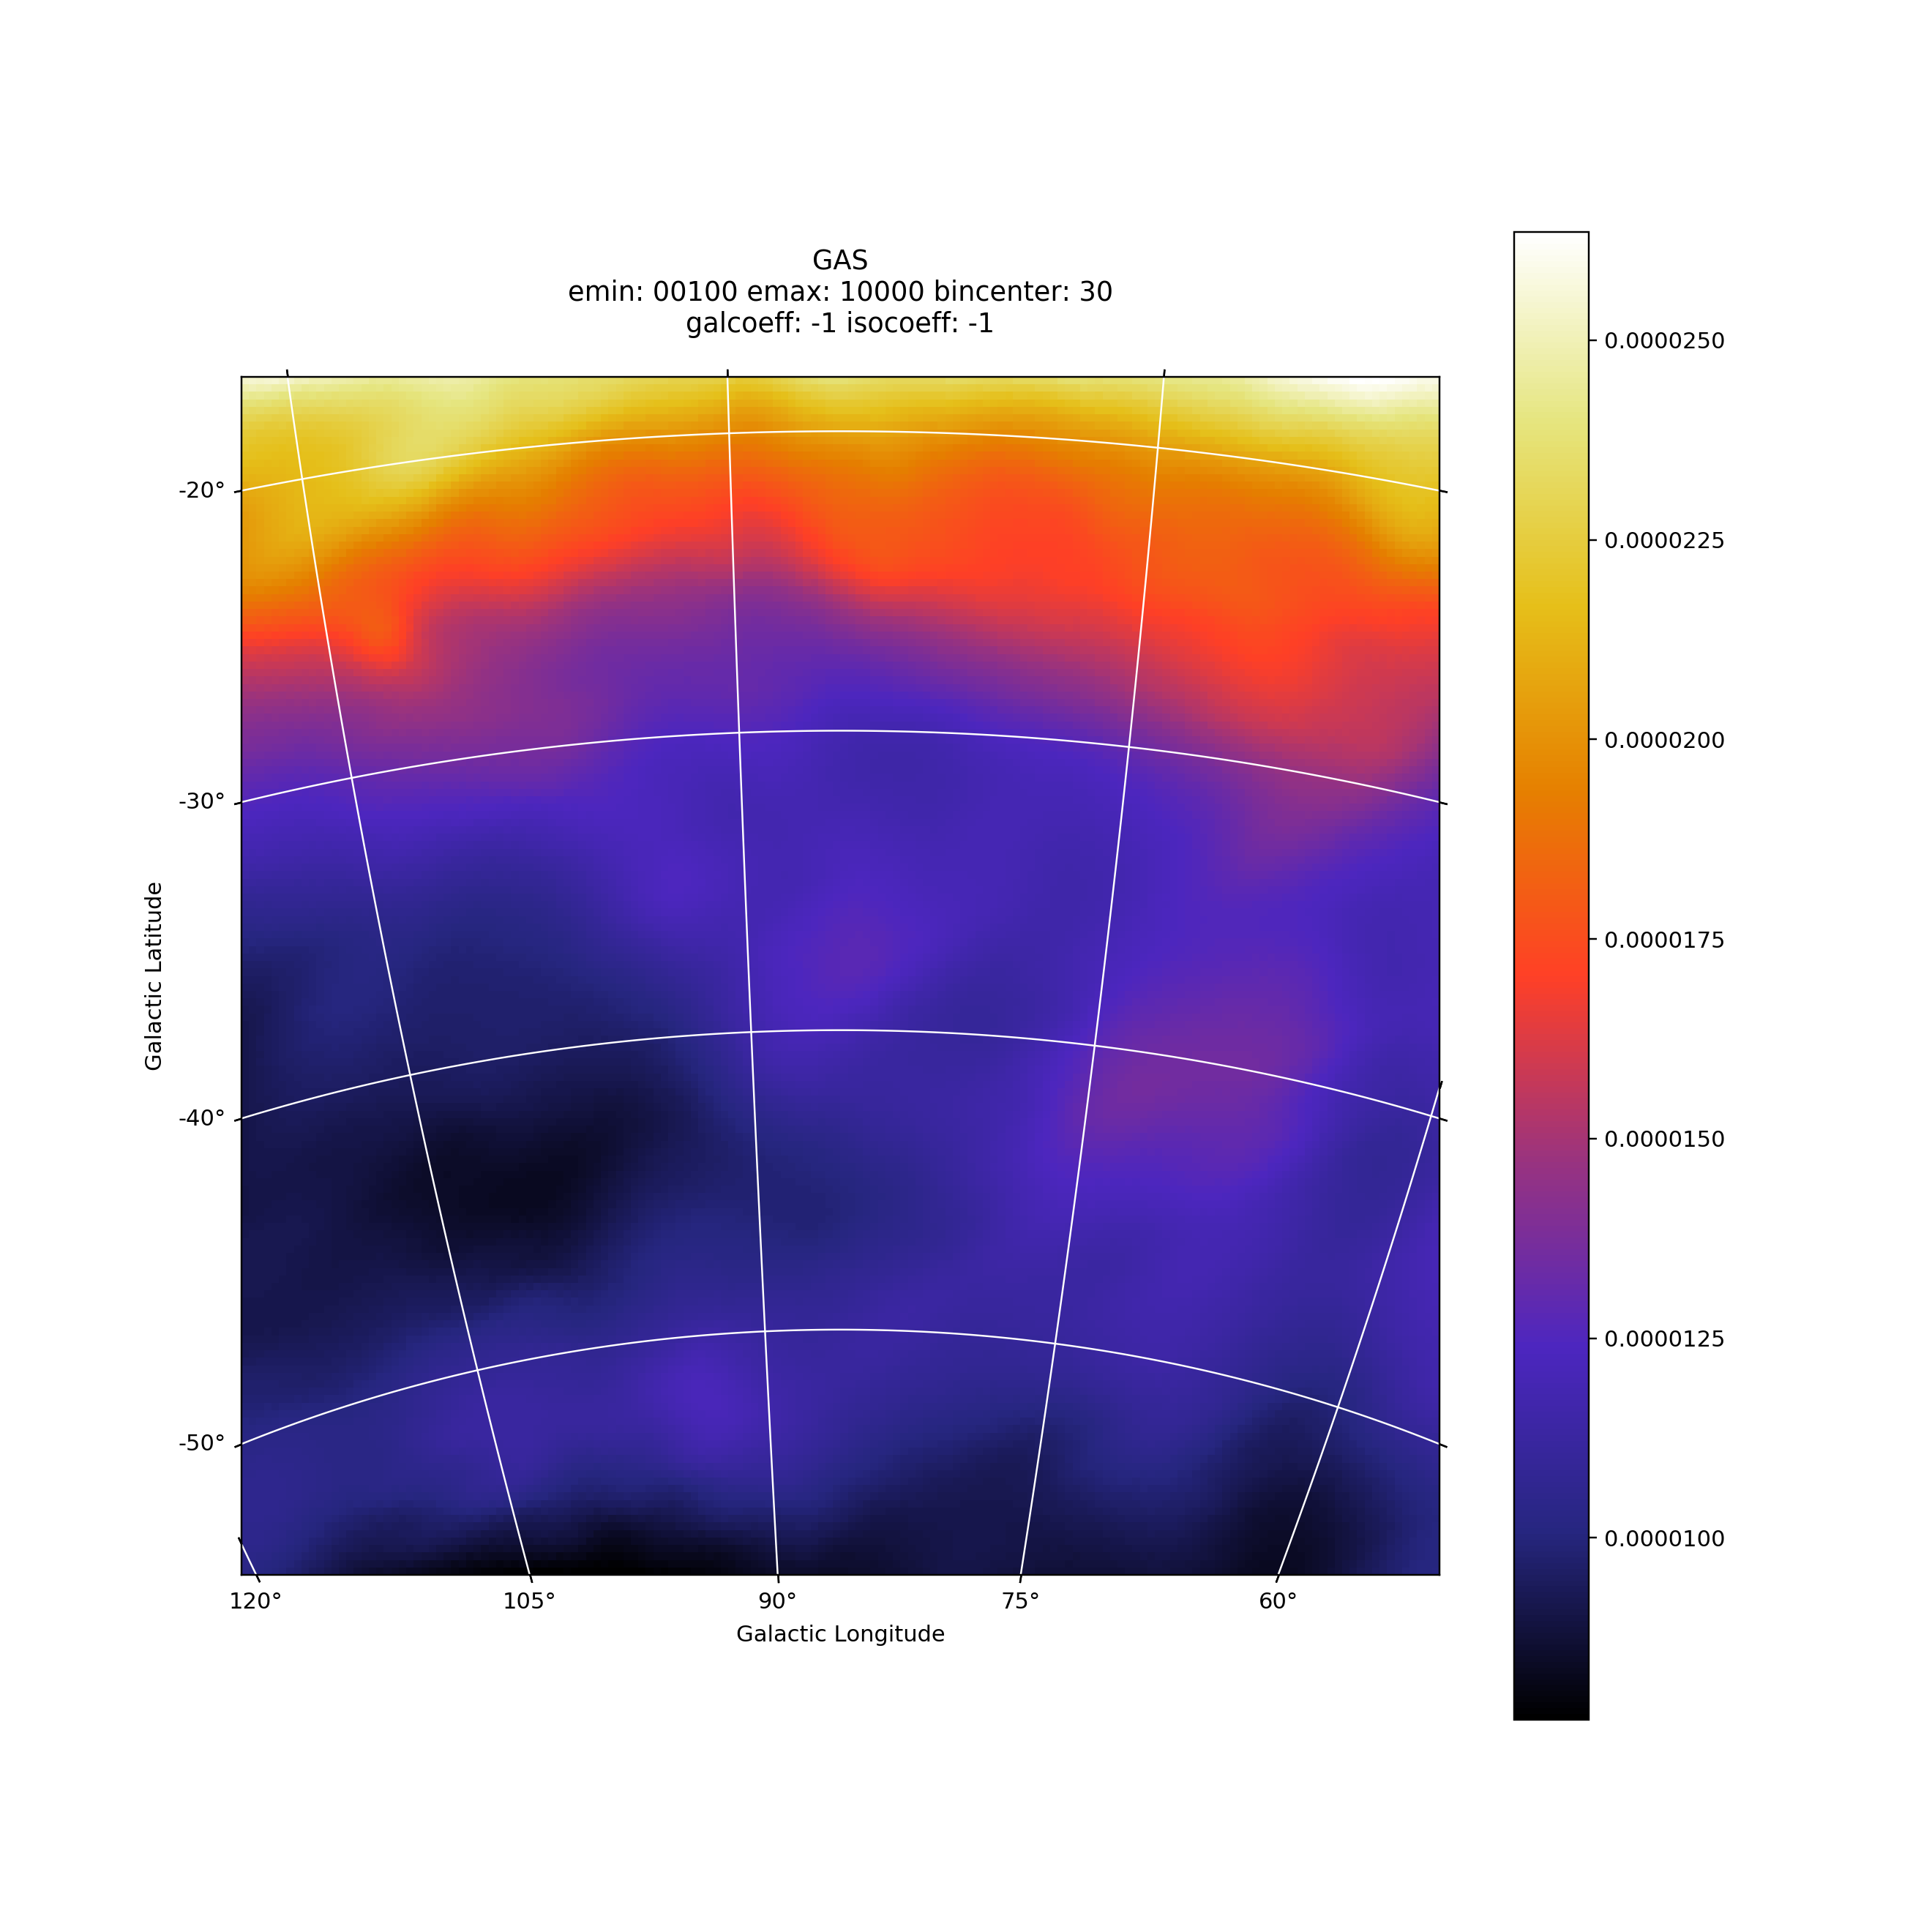

[None]

In [153]:
ag.displayGasSkyMaps()

In [159]:
ag.setOptions(galcoeff=[0])

In [156]:
ag.calcBkg("2AGLJ2254+1609")

([10.0539], [6.96609e-08])

In [160]:
ag.mle()

['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']

In [161]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 17.5869
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux: 3.46381e-06 +- 3.2403e-07
	- upper limit: 4.14116e-06
	- ergLog: 5.59807e-10 +- 5.23684e-11
	- galCoeff: [6.96609e-08]
	- isoCoeff: [10.0539]
-----------------------------------------------------------


In [162]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [10.0539],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [73]:
ag.setOptions(isocoeff=[8.76633])

In [163]:
ag.mle()

['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']

In [164]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 17.5869
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux: 3.46381e-06 +- 3.2403e-07
	- upper limit: 4.14116e-06
	- ergLog: 5.59807e-10 +- 5.23684e-11
	- galCoeff: [6.96609e-08]
	- isoCoeff: [10.0539]
-----------------------------------------------------------


In [56]:
ag.lightCurve("2AGLJ2254+1609", binsize=86400)

t_start t_end sqrt_ts flux flux_err flux_ul
216000000.0 216086400.0 3.38217 3.38217 1.2254e-06 5.82221e-06
216086400.0 216172800.0 3.98244 3.98244 1.40646e-06 7.02663e-06
216172800.0 216259200.0 3.56472 3.56472 1.58966e-06 7.60322e-06
216259200.0 216345600.0 6.25463 6.25463 1.36638e-06 8.67149e-06
216345600.0 216432000.0 3.86376 3.86376 1.02141e-06 5.16691e-06
216432000.0 216518400.0 4.25688 4.25688 1.16614e-06 5.68039e-06
216518400.0 216604800.0 3.57606 3.57606 1.0437e-06 4.85955e-06
216604800.0 216691200.0 4.54135 4.54135 1.0193e-06 5.47243e-06
216691200.0 216777600.0 3.94536 3.94536 1.3067e-06 6.40967e-06
216777600.0 216864000.0 4.63572 4.63572 1.0882e-06 5.94387e-06
216864000.0 216950400.0 5.26905 5.26905 1.51681e-06 8.51183e-06
216950400.0 217036800.0 5.19695 5.19695 1.66665e-06 9.48513e-06
217036800.0 217123200.0 12.9709 12.9709 3.04509e-06 3.02431e-05
217123200.0 217209600.0 18.788 18.788 2.51306e-06 3.46448e-05
217209600.0 217296000.0 17.9522 17.9522 3.03535e-06 3.73957e-05
217

'/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/light_curve_216000000_218592000.txt'